# Importação das Bibliotecas

In [180]:
import numpy as np
import pandas as pd
from scipy.io import wavfile as wav
import struct
import matplotlib.pyplot as plt
import glob
import os

# path = os.getcwd()
# name_bases = os.listdir('Trabalho_de_processamento/Ballroom/')



# Variavel global

In [181]:

arquivo= glob.glob(path+f'/Trabalho_de_processamento/Ballroom/*/*.wav')
linha = len(arquivo)
contador = 0


# Cria a Matriz de armazenamento de dados

In [182]:
matriz = []
for i in range(linha):
    matriz.append([])
    for j in range(5):
        matriz[i].append([])

# Função de Extrassão de Caracteristicas


In [183]:
def extrassao_de_dados_da_classe(caminho,linhas):
    rate, wav_sample = wav.read(caminho)
    wave_file = open(caminho,"rb")
    riff_fmt = wave_file.read(36)
    bit_depth_string = riff_fmt[-2:]
    bit_depth = struct.unpack("H",bit_depth_string)[0]
  
    #pegar nome da pasta
    final = caminho.rfind("/")
    inicio = caminho.rfind("/",1,final-1)
    nome_base=caminho[inicio+1:final]

   
    armazena_dados_na_matriz(rate,wav_sample.shape[0],bit_depth,wav_sample.shape[0]/rate,nome_base)
    
    return contador + 1
    

# Salva os dados na matriz

In [184]:
def armazena_dados_na_matriz(taxa,canais,bits,duracao,nome_base):
    matriz[contador][0] = duracao
    matriz[contador][1] = taxa
    matriz[contador][2] = bits
    matriz[contador][3] = canais
    matriz[contador][4] = nome_base


# Abre todos os aquivos .wav da pasta (Nome da pasta)

---



In [185]:
for i in arquivo:
    contador = extrassao_de_dados_da_classe(i,linha)
    

# Salvando arquivo .csv

In [186]:
pd.DataFrame(matriz).to_csv(path+f"/Trabalho_de_processamento/Ballroom/csv/Base_Ballroom.csv")

In [187]:
#mostrar arquivo
metadata_path = pd.read_csv(path+f"/Trabalho_de_processamento/Ballroom/csv/Base_Ballroom.csv",)
metadata_path
  

,Unnamed: 0,0,1,2,3,4
0,0,31.787937,44100,16,1401848,ChaChaCha
1,1,31.787937,44100,16,1401848,ChaChaCha
2,2,31.787937,44100,16,1401848,ChaChaCha
3,3,31.787937,44100,16,1401848,ChaChaCha
4,4,31.787937,44100,16,1401848,ChaChaCha
5,5,31.787937,44100,16,1401848,ChaChaCha
6,6,31.787937,44100,16,1401848,ChaChaCha
7,7,30.719501,44100,16,1354730,ChaChaCha
8,8,31.787937,44100,16,1401848,ChaChaCha
9,9,34.063492,44100,16,1502200,ChaChaCha


# Plotar grafico

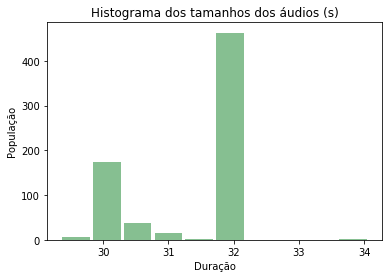

In [188]:
plt.hist(metadata_path['0'], rwidth=0.9, color='#86bf91')

plt.xlabel('Duração')
plt.ylabel('População')
plt.title('Histograma dos tamanhos dos áudios (s)')
plt.grid(False)
plt.show()

